In [1]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'diabetes.csv'

pima = pd.read_csv(path)

In [2]:
# print the first 5 rows of data
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# define X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = pima[feature_cols]
y = pima.Outcome

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [7]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [8]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

The zero value is present 130 times and the one value is present 62 times. This is known as the **class distribution**. Null accuracy answers the question if the model was to predict the predominant class 100% of the time, how often would it be correct.

Because y_test only contains 1s and 0s we can calculate the percentage of 1s by simply taking the mean (only works for binary class problems).

In [9]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In this case 32% of the values in y_test are 1s. We can calculate the percentage of 0s by taking 1-y_test.mean().

In [10]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

Since 68 is greater than 32 we would say that 68% is the null accuracy for this problem. In other words a dumb model always predicts that a patient does not have diabetes will be right 68% of the time. This is obviously not a useful model but it provides a baseline against which we might want to measure our logistic regression model. When we compare the null accuracy of 68% with the model accuracy of 69% suddenly our model does not look very good. This demonstrates one weakness of classification accuracy as a model evaluation metric and that classification accuracy does not tell us anything about the underlying distribution of the testing set.

In [11]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [12]:
# calculate null accuracy (for multi-class classification problems)
# only work if y_test is a pandas series
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

In [13]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

* **Classification accuracy** is the easiest classification metric to understand
* But, it does not tell you the underlying distribution of response values
* And, it does not tell you what "types" of errors your classifier is making

### Confusion matrix
Table that describes the performance of a classification model

In [14]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


* Every observation in the testing set is represented in exactly one box
* It's a 2x2 matrix because there are 2 response classes
* The format shown here is not universal

### Basic terminology
* **True Positives (TP):** we correctly predicted that they do have diabetes
* **True Negatives (TN):** we correctly predicted that they don't have diabetes
* **False Positives (FP):** we incorrectly predicted that they do have diabetes (a "Type I error")
* **False Negatives (FN):** we incorrectly predicted that they don't have diabetes (a "Type II error")

In [15]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Metrics computed from a confusion matrix
**Classification Accuracy:** Overall, how often is the classifier correct?

In [17]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


**Classification Error:** Overall, how often is the classifier incorrect?
* Also known as "**Misclassification Rate**"

In [18]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


**Sensitivity:** When the actual value is positive, how often is the prediction correct?
* How "sensitive" is the classifier to detecting positive instances?
* Also known as "**True Positive Rate**" or "**Recall**"

In [19]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


**Specificity:** When the actual value is negative, how often is the prediction correct?
* How "specific" (or "selective") is the classifier in predicting positive instances?

In [20]:
print(TN / float(TN + FP))

0.9076923076923077


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect? (1 - Specificity)

In [21]:
print(FP / float(TN + FP))

0.09230769230769231


**Precision:** When a positive value is predicted, how often is the prediction correct?
* How "precise" is the classifier when predicting positive instances?

In [22]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**
* Confusion matrix gives you a more complete picture of how your classifier is performing
* Also allows you to compute various classification metrics, and these metrics can guide your model selection

**Which metrics should you focus on?**
* Choice of metric depends on your **business objective**
* **Spam filter** (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
* **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Adjusting the classification threshold

In [23]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [24]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

The model learns a coefficient for each input feature during the model training process. Those coefficients are used to calculate the likelihood of each class for each observation in the test set. Since this model predicts the likelihood of diabetes we might rank observations by predicted probability of diabetes and prioritize our patient preventative outreach accordingly, since it makes more sense to contact someone with a 95% chance of diabetes then a 55% chance. It turns out that when we run the predict method for a classification model it first predicts the probabilities for each class and then chooses the class with the hightest probability as the predicted response. For a binary problem like this one another way of thinking about it is that there is a 0.5 classification threshold and class 1 is predicted only if that threshold is exceeded otherwise class 0 is predicted. As you can see there are only 2 instances(8th and 10th) shown in which the probability of class 1 exceeds 0.5. Those are the instances in which class 1 is predicted.

In [25]:
# print the first 10 predicted probabilities for class 1
# isolate the predicted probabilities for class 1.
# knowing that one is enough for calculating predicting probability of both classes.
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [26]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [27]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'Frequency')

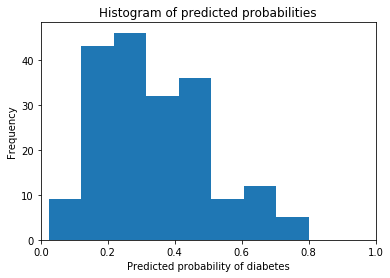

In [28]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Given the 0.5 classification threshold, we can see from the histogram that class 1 is rarely predicted since only a small minority of the testing set observations had a predicted probability above the threshold.

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [29]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [30]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [31]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

There are now 5 instances in which class 1 is predicted. To see the impact of this change across the entire testing set we can print the previous confusion matrix stored in confusion object, as well as the new confusion matrix generated by the function.

In [32]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [33]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


The row totals have not changed since the rows represent the actual response values. So there are still 130 observations in the top row and 62 observations in the bottom row. But the column totals have changed because a lot of the class 0 predictions have moved to class 1. We can recalculate sensitivity, which is increased and specificity, which is decreased.

In [34]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [35]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


**Conclusion:**
* Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
* Threshold can be adjusted to increase sensitivity or specificity
* Sensitivity and specificity have an inverse relationship

It seems incredibly inefficient to sarch for an optimal threshold by trying different threshold values one at time. We do not have to try each threshold. There is a very simple mechanism: Plot the ROC curve.

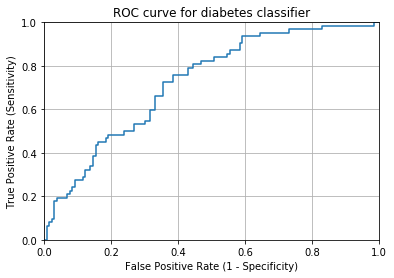

In [36]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

* ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
* You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [37]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [38]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [39]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


AUC is the percentage of the ROC plot that is underneath the curve:

In [40]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


* AUC is useful as a single number summary of classifier performance.
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
* AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [41]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618

**Confusion matrix advantages:**

* Allows you to calculate a variety of metrics
* Useful for multi-class problems (more than two response classes)

**ROC/AUC advantages:**

* Does not require you to set a classification threshold
* Still useful when there is high class imbalance